In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
data = pd.read_csv("proc.data",header=None)
print(data.head(10))

               0
0  111111 111111
1            200
2  111111 111112
3           1393
4  111111 111113
5           1869
6  111111 111121
7           1597
8  111111 111122
9           1896


In [4]:
column1 = data.iloc[::2] 
column2 = data.iloc[1::2]
column1.head()

,0
0,111111 111111
2,111111 111112
4,111111 111113
6,111111 111121
8,111111 111122


In [5]:
column2.head()

,0
1,200
3,1393
5,1869
7,1597
9,1896


In [147]:
column1.reset_index(drop=True, inplace=True)
column2.reset_index(drop=True, inplace=True)

data_con = pd.concat([column1, column2], axis=1)
df=data_con.set_axis(['Genome', 'Fitness'], axis=1)
df['Genome'] = df['Genome'].str.replace(" ", "")
df['Fitness'] = pd.to_numeric(df['Fitness'])
df.head(10)

,Genome,Fitness
0,111111111111,200
1,111111111112,1393
2,111111111113,1869
3,111111111121,1597
4,111111111122,1896
5,111111111123,1960
6,111111111131,1875
7,111111111132,1959
8,111111111133,1961
9,111111111211,1639


In [181]:
df.sort_values(by='Fitness',ascending=False)

,Genome,Fitness
474669,331121121211,1979
21959,112121121133,1979
238397,221121111223,1976
433111,322111121122,1976
500824,332221111112,1975
...,...,...
57582,113331333311,1235
58554,113333133311,1235
58884,113333313331,1233
172764,133313333311,1233


In [152]:
import pandas as pd

summary_stats = df['Fitness'].describe()
print(summary_stats)


count    531441.000000
mean       1628.979087
std         147.337495
min         200.000000
25%        1515.000000
50%        1607.000000
75%        1726.000000
max        1979.000000
Name: Fitness, dtype: float64


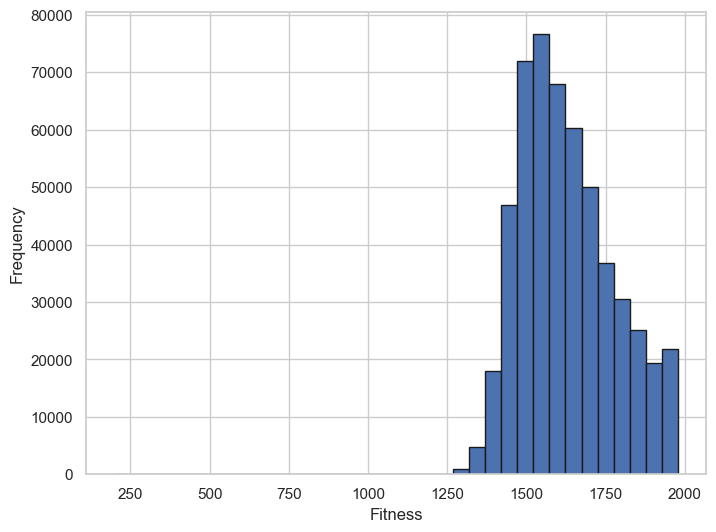

In [323]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df['Fitness'], bins=35, edgecolor='k')

plt.xlabel('Fitness')
plt.ylabel('Frequency')
plt.savefig('hist.png',dpi=1280)
plt.show()


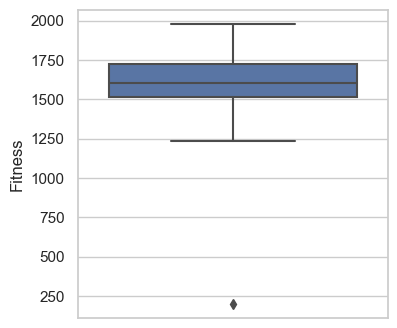

In [554]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(4, 4))  

sns.boxplot(y="Fitness", data=df)

plt.ylabel("Fitness")
plt.savefig('fitness_boxplot1.png',dpi=1000)
plt.show()


In [10]:
df.sort_values(by='Fitness',ascending=False)

,Genome,Fitness
475742,331122 232113,1793
213598,212323 111112,1670
466033,323311 132222,1786
203889,212211 311221,1627
194180,211323 211323,1528
...,...,...
57582,113331 333311,1235
58554,113333 133311,1235
58884,113333 313331,1233
172764,133313 333311,1233


In [150]:
import numpy as np

genome_ls = df['Genome']
genome_arr = np.array([list(map(int, genome)) for genome in genome_ls])

genome_arr


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 2],
       [1, 1, 1, ..., 1, 1, 3],
       ...,
       [3, 3, 3, ..., 3, 3, 1],
       [3, 3, 3, ..., 3, 3, 2],
       [3, 3, 3, ..., 3, 3, 3]])

In [288]:
target = df['Fitness']*1/2000.0

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    genome_arr, df['Fitness']*1/2000.0, test_size=0.3, random_state=42)

In [48]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (372008, 12)
X_test shape: (159433, 12)
y_train shape: (372008,)
y_test shape: (159433,)


## Recurrent Neural Network Model 1

In [475]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard


n_model = Sequential()

n_model.add(LSTM(64, input_shape=(12,1)))  
n_model.add(Dense(1))  

n_model.compile(loss='mean_squared_error', optimizer='adam')


tensorboard_callback = TensorBoard(log_dir='./logs')
history_n=n_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2,callbacks=[tensorboard_callback])

loss = n_model.evaluate(X_test, y_test)

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.


Epoch 1/50
29761/29761 [==============================] - 343s 11ms/step - loss: 8.6319e-04 - val_loss: 1.9167e-04
Epoch 2/50
29761/29761 [==============================] - 366s 12ms/step - loss: 1.5020e-04 - val_loss: 1.0621e-04
Epoch 3/50
29761/29761 [==============================] - 366s 12ms/step - loss: 1.0390e-04 - val_loss: 8.1689e-05
Epoch 4/50
29761/29761 [==============================] - 382s 13ms/step - loss: 8.7441e-05 - val_loss: 8.0409e-05
Epoch 5/50
29761/29761 [==============================] - 379s 13ms/step - loss: 7.9101e-05 - val_loss: 6.2382e-05
Epoch 6/50
29761/29761 [==============================] - 362s 12ms/step - loss: 7.3810e-05 - val_loss: 7.2241e-05
Epoch 7/50
29761/29761 [==============================] - 354s 12ms/step - loss: 6.9608e-05 - val_loss: 9.6118e-05
Epoch 8/50
29761/29761 [==============================] - 361s 12ms/step - loss: 6.6958e-05 - val_loss: 6.2524e-05
Epoch 9/50
29761/29761 [==============================] - 368s 12ms/step - loss:

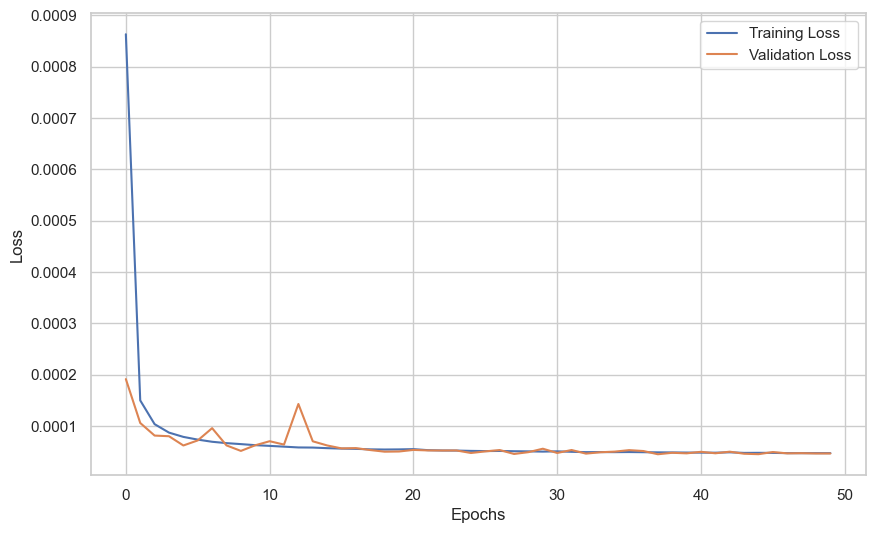

In [477]:
plt.rcParams["font.size"] = 20
plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(10, 6))
plt.plot(history_n.history['loss'], label='Training Loss')
plt.plot(history_n.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.title('Learning curves of RNN')
plt.savefig("rnn_learning_m1.png", dpi=500)
plt.show()

In [478]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
rn_y_pred1=n_model.predict(X_test)
n1_mse = round(mean_squared_error(y_test, rn_y_pred1),4)
n1_rmse=round(np.sqrt(n1_mse),4)
n1_mae = round(mean_absolute_error(y_test, rn_y_pred1),4)
n1_r2=round(r2_score(y_test, rn_y_pred1),4)
print("MAE score of RNN is: ", n1_mae)
print("RMSE score of RNN is: ", n1_rmse)
print("R2 score of RNN is: ", n1_r2)



4983/4983 [==============================] - 25s 5ms/step
MAE score of RNN is:  0.0057
RMSE score of RNN is:  0.01
R2 score of RNN is:  0.9906


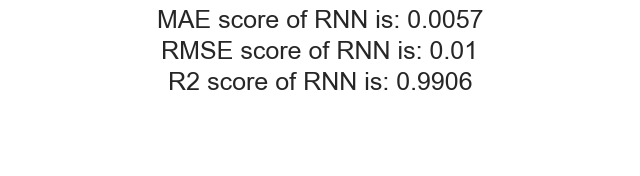

In [510]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,2))
plt.rcParams["font.size"] = 18
plt.rcParams["font.family"] = "Arial"

ax.text(0.5, 0.9, f"MAE score of RNN is: {n1_mae}", ha="center")
ax.text(0.5, 0.7, f"RMSE score of RNN is: {n1_rmse}", ha="center")
ax.text(0.5, 0.5, f"R2 score of RNN is: {n1_r2}", ha="center")

ax.axis("off")

plt.savefig("rnn_scores.png", dpi=300)

plt.show()


The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.


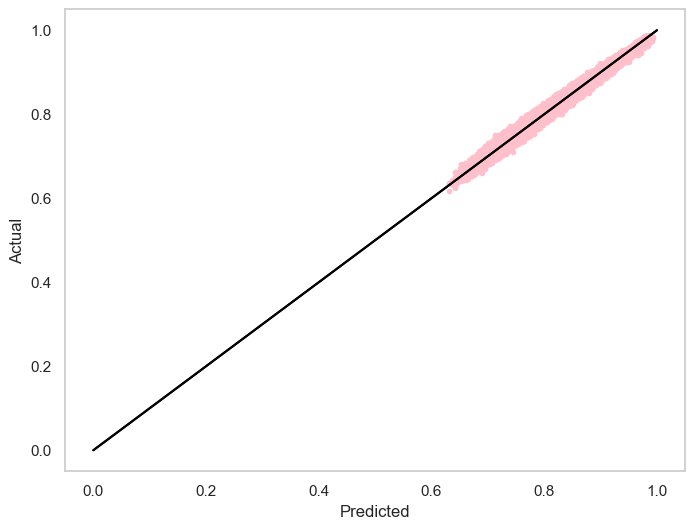

In [517]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
t1 = [0,0.5, 1]

s1 = [0,0.5, 1]

#plt.rcParams["font.size"] = 20
#plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(8, 6))
plt.plot(rn_y_pred1[0:X_test.shape[0]], y_test[0:X_test.shape[0]], '.',color='pink')
plt.plot(t1, t1, s1, s1, color='black')         
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
#plt.title('RNN: Actual V/s Predicted Values')
plt.savefig("rnn_actpre7.png", dpi=500)
plt.show()

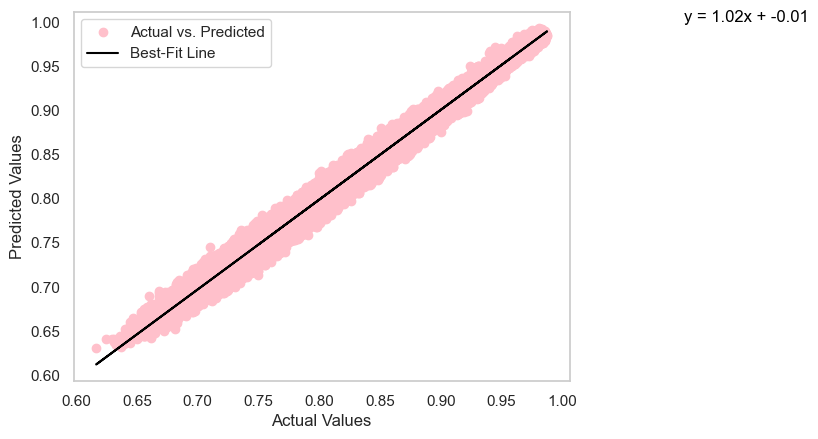

In [491]:
slope2, intercept2 = np.polyfit(y_test, rn_y_pred1, 1)
best_fit_line2 = slope2 * y_test + intercept2

plt.scatter(y_test, rn_y_pred1, color='pink',label='Actual vs. Predicted')
plt.plot(y_test, best_fit_line2, color='black', label='Best-Fit Line')
equation2 = f'y = {slope2.item():.2f}x + {intercept2.item():.2f}'
plt.text(1.1, 1, equation2, fontsize=12, color='black')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(False)
plt.savefig('bestline1.png')
plt.show()



In [531]:
import numpy as np


y_test_reshaped = np.array(y_test).reshape((-1, 1))

f_statistic1, p_value1 = f_oneway(rn_y_pred1, y_test_reshaped)
print(p_value1)
print(f_statistic1)


[0.00028964]
[13.13649412]


In [77]:
final_df=pd.DataFrame(rn_y_pred[0:X_test.shape[0]], y_test[0:X_test.shape[0]])
final_df

C:\Users\rkp22\AppData\Local\Temp\ipykernel_7488\3085222368.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  final_df=pd.DataFrame(rn_y_pred[0:X_test.shape[0]], y_test[0:X_test.shape[0]])


,0
Fitness,
0.9580,0.950922
0.7330,0.743314
0.8505,0.855641
0.7090,0.717848
0.6995,0.697245
...,...
0.8115,0.811144
0.7930,0.783635
0.8720,0.871680


Epoch 1/20


C:\Users\rkp22\AppData\Local\Temp\ipykernel_20488\3118911010.py:24: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_subset = y_train[:subset_size]


5952/5952 [==============================] - 28s 5ms/step - loss: 0.0032 - val_loss: 0.0010
Epoch 2/20
5952/5952 [==============================] - 26s 4ms/step - loss: 8.6855e-04 - val_loss: 7.9875e-04
Epoch 3/20
5952/5952 [==============================] - 26s 4ms/step - loss: 5.5753e-04 - val_loss: 5.3759e-04
Epoch 4/20
5952/5952 [==============================] - 26s 4ms/step - loss: 3.6079e-04 - val_loss: 3.0189e-04
Epoch 5/20
5952/5952 [==============================] - 26s 4ms/step - loss: 2.4672e-04 - val_loss: 2.2053e-04
Epoch 6/20
5952/5952 [==============================] - 26s 4ms/step - loss: 1.9074e-04 - val_loss: 1.8469e-04
Epoch 7/20
5952/5952 [==============================] - 27s 4ms/step - loss: 1.6325e-04 - val_loss: 1.7267e-04
Epoch 8/20
5952/5952 [==============================] - 26s 4ms/step - loss: 1.4461e-04 - val_loss: 1.6010e-04
Epoch 9/20
5952/5952 [==============================] - 26s 4ms/step - loss: 1.2748e-04 - val_loss: 1.3585e-04
Epoch 10/20
5952/595

C:\Users\rkp22\AppData\Local\Temp\ipykernel_20488\3118911010.py:24: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_subset = y_train[:subset_size]
C:\Users\rkp22\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


11905/11905 [==============================] - 62s 5ms/step - loss: 8.4541e-05 - val_loss: 9.5197e-05
Epoch 2/20
11905/11905 [==============================] - 64s 5ms/step - loss: 8.1118e-05 - val_loss: 7.1429e-05
Epoch 3/20
11905/11905 [==============================] - 65s 5ms/step - loss: 7.6576e-05 - val_loss: 8.5219e-05
Epoch 4/20
11905/11905 [==============================] - 61s 5ms/step - loss: 7.6649e-05 - val_loss: 9.6400e-05
Epoch 5/20
11905/11905 [==============================] - 62s 5ms/step - loss: 7.3883e-05 - val_loss: 7.3335e-05
Epoch 6/20
11905/11905 [==============================] - 64s 5ms/step - loss: 7.2932e-05 - val_loss: 1.0017e-04
Epoch 7/20
11905/11905 [==============================] - 63s 5ms/step - loss: 7.2525e-05 - val_loss: 6.8741e-05
Epoch 8/20
11905/11905 [==============================] - 62s 5ms/step - loss: 6.9690e-05 - val_loss: 5.9131e-05
Epoch 9/20
11905/11905 [==============================] - 61s 5ms/step - loss: 6.9055e-05 - val_loss: 6.015

C:\Users\rkp22\AppData\Local\Temp\ipykernel_20488\3118911010.py:24: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_subset = y_train[:subset_size]
C:\Users\rkp22\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


17857/17857 [==============================] - 87s 5ms/step - loss: 6.0237e-05 - val_loss: 5.9259e-05
Epoch 2/20
17857/17857 [==============================] - 87s 5ms/step - loss: 5.9722e-05 - val_loss: 6.0063e-05
Epoch 3/20
17857/17857 [==============================] - 91s 5ms/step - loss: 5.7851e-05 - val_loss: 5.4023e-05
Epoch 4/20
17857/17857 [==============================] - 92s 5ms/step - loss: 5.7918e-05 - val_loss: 5.9740e-05
Epoch 5/20
17857/17857 [==============================] - 92s 5ms/step - loss: 5.7580e-05 - val_loss: 5.3235e-05
Epoch 6/20
17857/17857 [==============================] - 92s 5ms/step - loss: 5.6160e-05 - val_loss: 5.1271e-05
Epoch 7/20
17857/17857 [==============================] - 92s 5ms/step - loss: 5.7217e-05 - val_loss: 6.8235e-05
Epoch 8/20
17857/17857 [==============================] - 92s 5ms/step - loss: 5.6943e-05 - val_loss: 5.1356e-05
Epoch 9/20
17857/17857 [==============================] - 92s 5ms/step - loss: 5.5472e-05 - val_loss: 5.149

C:\Users\rkp22\AppData\Local\Temp\ipykernel_20488\3118911010.py:24: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_subset = y_train[:subset_size]
C:\Users\rkp22\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


23809/23809 [==============================] - 123s 5ms/step - loss: 5.2107e-05 - val_loss: 6.7771e-05
Epoch 2/20
23809/23809 [==============================] - 123s 5ms/step - loss: 5.0968e-05 - val_loss: 4.8089e-05
Epoch 3/20
23809/23809 [==============================] - 123s 5ms/step - loss: 5.2395e-05 - val_loss: 4.6650e-05
Epoch 4/20
23809/23809 [==============================] - 122s 5ms/step - loss: 5.0694e-05 - val_loss: 4.9324e-05
Epoch 5/20
23809/23809 [==============================] - 123s 5ms/step - loss: 5.0928e-05 - val_loss: 5.4740e-05
Epoch 6/20
23809/23809 [==============================] - 122s 5ms/step - loss: 5.0876e-05 - val_loss: 4.8798e-05
Epoch 7/20
23809/23809 [==============================] - 123s 5ms/step - loss: 4.9785e-05 - val_loss: 6.9847e-05
Epoch 8/20
23809/23809 [==============================] - 123s 5ms/step - loss: 5.0646e-05 - val_loss: 4.6199e-05
Epoch 9/20
23809/23809 [==============================] - 123s 5ms/step - loss: 5.0112e-05 - val_lo

C:\Users\rkp22\AppData\Local\Temp\ipykernel_20488\3118911010.py:24: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_subset = y_train[:subset_size]
C:\Users\rkp22\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


29761/29761 [==============================] - 153s 5ms/step - loss: 4.8051e-05 - val_loss: 5.4283e-05
Epoch 2/20
29761/29761 [==============================] - 154s 5ms/step - loss: 4.8035e-05 - val_loss: 4.6441e-05
Epoch 3/20
29761/29761 [==============================] - 153s 5ms/step - loss: 4.7948e-05 - val_loss: 4.8072e-05
Epoch 4/20
29761/29761 [==============================] - 153s 5ms/step - loss: 4.7187e-05 - val_loss: 5.0587e-05
Epoch 5/20
29761/29761 [==============================] - 153s 5ms/step - loss: 4.7795e-05 - val_loss: 4.8569e-05
Epoch 6/20
29761/29761 [==============================] - 154s 5ms/step - loss: 4.7449e-05 - val_loss: 5.7948e-05
Epoch 7/20
29761/29761 [==============================] - 154s 5ms/step - loss: 4.6998e-05 - val_loss: 4.8854e-05
Epoch 8/20
29761/29761 [==============================] - 154s 5ms/step - loss: 4.7238e-05 - val_loss: 4.6438e-05
Epoch 9/20
29761/29761 [==============================] - 154s 5ms/step - loss: 4.6631e-05 - val_lo

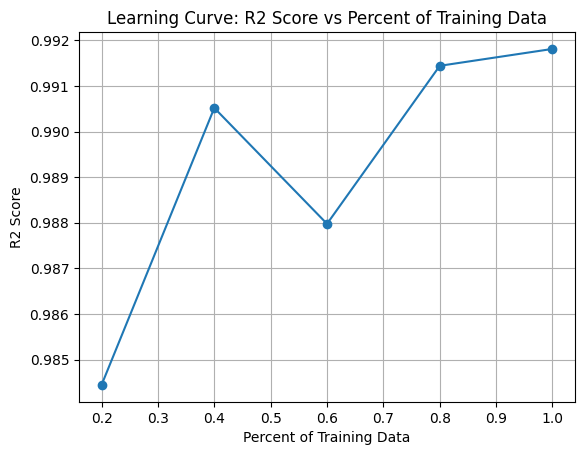

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

n_model = Sequential()
n_model.add(LSTM(64, input_shape=(12, 1)))
n_model.add(Dense(1))
n_model.compile(loss='mean_squared_error', optimizer='adam')

training_set_sizes = np.linspace(0.2, 1.0, 5) 
n_r2_scores = []

for fraction in training_set_sizes:
    subset_size = int(fraction * X_train.shape[0])
    X_subset = X_train[:subset_size]
    y_subset = y_train[:subset_size]
    
    tensorboard_callback3 = TensorBoard(log_dir='./logs')
    history_n = n_model.fit(X_subset, y_subset, epochs=20, batch_size=10, validation_split=0.2, callbacks=[tensorboard_callback3])

    n_loss = n_model.evaluate(X_test, y_test)
    
    n_y_pred = n_model.predict(X_test)
    n_r2 = r2_score(y_test, n_y_pred)  
    n_r2_scores.append(n_r2) 

plt.plot(training_set_sizes, n_r2_scores, marker='o')
plt.xlabel('Percent of Training Data')
plt.ylabel('R2 Score')
plt.title('Learning Curve: R2 Score vs Percent of Training Data')
plt.grid(True)
plt.savefig("R2curve_n.png", dpi=500)
plt.show()


## Recurrent Neural Network Model 2

In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

rnn_model = Sequential()

rnn_model.add(LSTM(64, input_shape=(12, 1), activation='linear', return_sequences=True))

rnn_model.add(LSTM(32, activation='sigmoid', return_sequences=True))

rnn_model.add(LSTM(16, activation='linear'))

rnn_model.add(Dense(64, activation='sigmoid'))

rnn_model.add(Dense(32, activation='sigmoid'))

rnn_model.add(Dense(1))

rnn_model.compile(loss='mean_squared_error', optimizer='adam')

tensorboard_callback1 = TensorBoard(log_dir='./logs')
history_rnn = rnn_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, callbacks=[tensorboard_callback1])

rnn_loss = rnn_model.evaluate(X_test, y_test)

Epoch 1/50
29761/29761 [==============================] - 304s 10ms/step - loss: 0.0010 - val_loss: 1.1596e-04
Epoch 2/50
29761/29761 [==============================] - 289s 10ms/step - loss: 1.0302e-04 - val_loss: 6.9392e-05
Epoch 3/50
29761/29761 [==============================] - 284s 10ms/step - loss: 7.9360e-05 - val_loss: 6.5872e-05
Epoch 4/50
29761/29761 [==============================] - 281s 9ms/step - loss: 7.0276e-05 - val_loss: 6.3570e-05
Epoch 5/50
29761/29761 [==============================] - 279s 9ms/step - loss: 6.5674e-05 - val_loss: 6.3597e-05
Epoch 6/50
29761/29761 [==============================] - 279s 9ms/step - loss: 6.2357e-05 - val_loss: 5.5125e-05
Epoch 7/50
29761/29761 [==============================] - 282s 9ms/step - loss: 6.0668e-05 - val_loss: 5.5713e-05
Epoch 8/50
29761/29761 [==============================] - 281s 9ms/step - loss: 5.9197e-05 - val_loss: 5.2397e-05
Epoch 9/50
29761/29761 [==============================] - 281s 9ms/step - loss: 5.7742e-0

In [96]:
rnn_y_pred = rnn_model.predict(X_test)

4983/4983 [==============================] - 24s 5ms/step


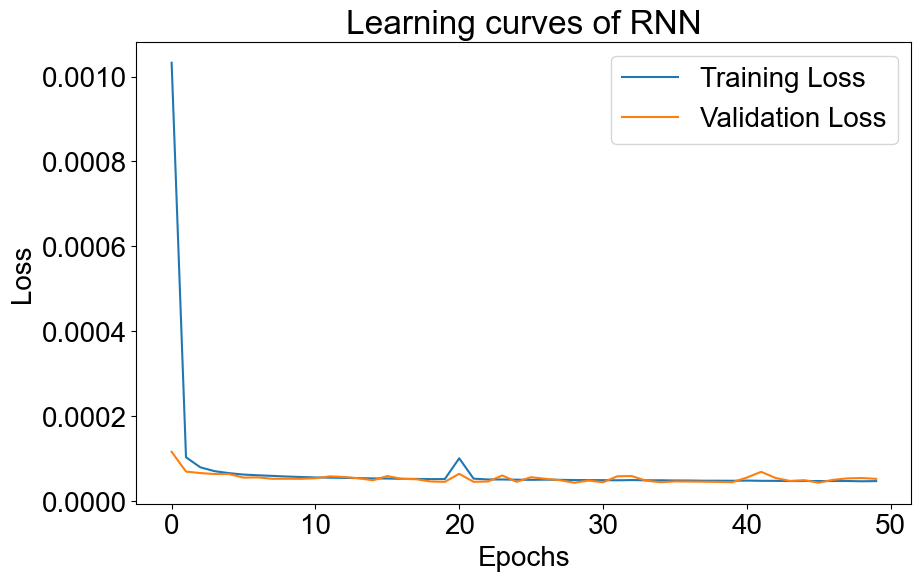

In [97]:
plt.rcParams["font.size"] = 20
plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning curves of RNN')
plt.savefig("rnn2_learning.png", dpi=500)
plt.show()

In [511]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

rnn_mse = round(mean_squared_error(y_test, rnn_y_pred),4)
rnn_rmse=round(np.sqrt(rnn_mse),4)
rnn_mae = round(mean_absolute_error(y_test, rnn_y_pred),4)
rnn_r2=round(r2_score(y_test, rnn_y_pred),4)
print("MAE score of RNN is: ", rnn_mae)
print("RMSE score of RNN is: ", rnn_rmse)
print("R2 score of RNN is: ", rnn_r2)


MAE score of RNN is:  0.0057
RMSE score of RNN is:  0.01
R2 score of RNN is:  0.9904


In [79]:
final_df=pd.DataFrame(rnn_y_pred[0:X_test.shape[0]], y_test[0:X_test.shape[0]])
final_df

C:\Users\rkp22\AppData\Local\Temp\ipykernel_7488\3011707319.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  final_df=pd.DataFrame(rnn_y_pred[0:X_test.shape[0]], y_test[0:X_test.shape[0]])


,0
Fitness,
0.9580,0.946996
0.7330,0.736020
0.8505,0.849194
0.7090,0.714025
0.6995,0.687799
...,...
0.8115,0.805591
0.7930,0.784919
0.8720,0.867126


The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.


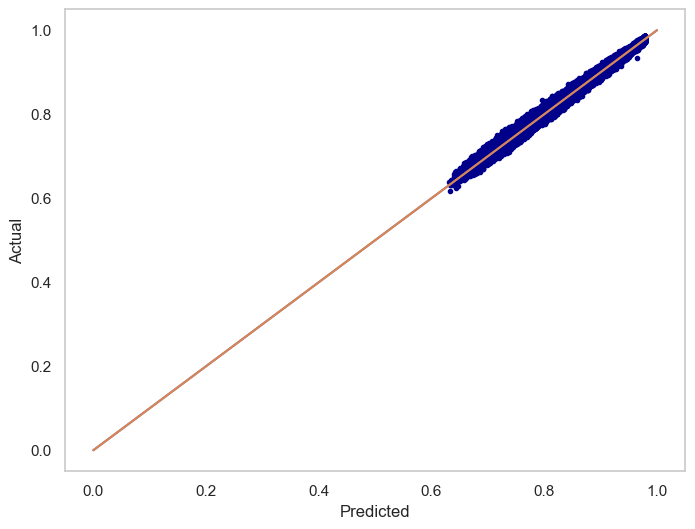

In [526]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
t1 = [0,0.5, 1]

s1 = [0,0.5, 1]

plt.rcParams["font.size"] = 20
plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(8, 6))
plt.plot(rnn_y_pred[0:X_test.shape[0]], y_test[0:X_test.shape[0]], '.',color='darkblue')
plt.plot(t1, t1, s1, s1)
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.title('RNN: Actual V/s Predicted Values')
plt.grid(False)
plt.savefig("rnn2_actpre7.png", dpi=500)
plt.show()

In [546]:
import numpy as np


y_test_reshaped = np.array(y_test).reshape((-1, 1))

f_statistic, p_value = f_oneway(rnn_y_pred, y_test_reshaped)

In [547]:

print(p_value)
print(f_statistic)

[3.13742388e-27]
[116.84536012]


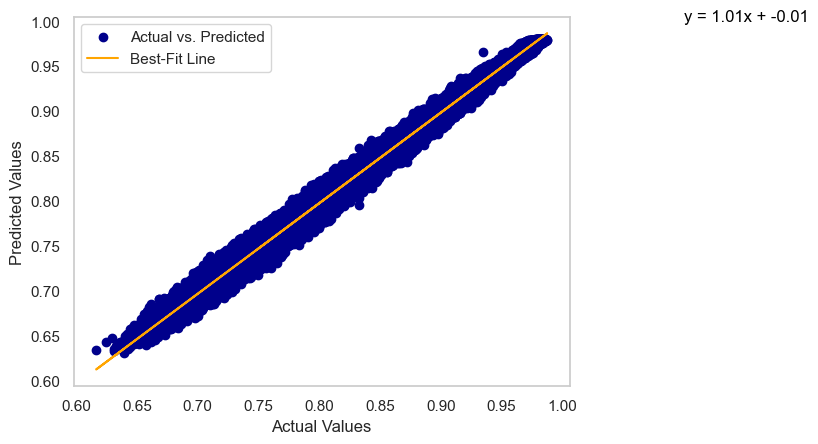

In [553]:
slope, intercept = np.polyfit(y_test, rnn_y_pred, 1)
best_fit_line = slope * y_test + intercept
t1 = [0,0.5, 1]

s1 = [0,0.5, 1]
plt.scatter(y_test, rnn_y_pred, color='darkblue',label='Actual vs. Predicted')
plt.plot(y_test, best_fit_line, color='orange', label='Best-Fit Line')
equation = f'y = {slope.item():.2f}x + {intercept.item():.2f}'
plt.text(1.1, 1, equation, fontsize=12, color='black')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(False)
plt.savefig('bestfitlineb.png',dpi=500)
plt.show()



Epoch 1/20


C:\Users\rkp22\AppData\Local\Temp\ipykernel_20488\2563330003.py:28: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_subset = y_train[:subset_size]
C:\Users\rkp22\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


5952/5952 [==============================] - 40s 6ms/step - loss: 0.0082 - val_loss: 0.0014
Epoch 2/20
5952/5952 [==============================] - 38s 6ms/step - loss: 8.2341e-04 - val_loss: 4.5335e-04
Epoch 3/20
5952/5952 [==============================] - 38s 6ms/step - loss: 4.0198e-04 - val_loss: 2.4284e-04
Epoch 4/20
5952/5952 [==============================] - 38s 6ms/step - loss: 2.3939e-04 - val_loss: 1.9448e-04
Epoch 5/20
5952/5952 [==============================] - 38s 6ms/step - loss: 1.7525e-04 - val_loss: 1.4754e-04
Epoch 6/20
5952/5952 [==============================] - 38s 6ms/step - loss: 1.3702e-04 - val_loss: 1.3488e-04
Epoch 7/20
5952/5952 [==============================] - 39s 7ms/step - loss: 1.1762e-04 - val_loss: 1.3825e-04
Epoch 8/20
5952/5952 [==============================] - 39s 7ms/step - loss: 1.0612e-04 - val_loss: 1.1897e-04
Epoch 9/20
5952/5952 [==============================] - 38s 6ms/step - loss: 9.7280e-05 - val_loss: 1.2471e-04
Epoch 10/20
5952/595

C:\Users\rkp22\AppData\Local\Temp\ipykernel_20488\2563330003.py:28: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_subset = y_train[:subset_size]
C:\Users\rkp22\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


11905/11905 [==============================] - 104s 9ms/step - loss: 7.0671e-05 - val_loss: 6.4441e-05
Epoch 2/20
11905/11905 [==============================] - 101s 8ms/step - loss: 6.8443e-05 - val_loss: 8.3659e-05
Epoch 3/20
11905/11905 [==============================] - 101s 8ms/step - loss: 6.6530e-05 - val_loss: 1.1155e-04
Epoch 4/20
11905/11905 [==============================] - 101s 9ms/step - loss: 6.5082e-05 - val_loss: 6.7294e-05
Epoch 5/20
11905/11905 [==============================] - 101s 8ms/step - loss: 6.4837e-05 - val_loss: 5.6655e-05
Epoch 6/20
11905/11905 [==============================] - 101s 8ms/step - loss: 6.2558e-05 - val_loss: 5.0733e-05
Epoch 7/20
11905/11905 [==============================] - 101s 8ms/step - loss: 6.2298e-05 - val_loss: 5.1796e-05
Epoch 8/20
11905/11905 [==============================] - 101s 8ms/step - loss: 6.1078e-05 - val_loss: 5.7274e-05
Epoch 9/20
11905/11905 [==============================] - 101s 8ms/step - loss: 6.4207e-05 - val_lo

C:\Users\rkp22\AppData\Local\Temp\ipykernel_20488\2563330003.py:28: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_subset = y_train[:subset_size]
C:\Users\rkp22\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


17857/17857 [==============================] - 151s 8ms/step - loss: 5.5378e-05 - val_loss: 1.1367e-04
Epoch 2/20
17857/17857 [==============================] - 152s 9ms/step - loss: 5.5275e-05 - val_loss: 4.8342e-05
Epoch 3/20
17857/17857 [==============================] - 151s 8ms/step - loss: 5.4711e-05 - val_loss: 5.3237e-05
Epoch 4/20
17857/17857 [==============================] - 153s 9ms/step - loss: 5.4074e-05 - val_loss: 7.7516e-05
Epoch 5/20
17857/17857 [==============================] - 151s 8ms/step - loss: 5.3256e-05 - val_loss: 4.6063e-05
Epoch 6/20
17857/17857 [==============================] - 151s 8ms/step - loss: 5.2949e-05 - val_loss: 5.9690e-05
Epoch 7/20
17857/17857 [==============================] - 151s 8ms/step - loss: 5.3013e-05 - val_loss: 1.6297e-04
Epoch 8/20
17857/17857 [==============================] - 151s 8ms/step - loss: 5.2760e-05 - val_loss: 5.7518e-05
Epoch 9/20
17857/17857 [==============================] - 151s 8ms/step - loss: 5.2428e-05 - val_lo

C:\Users\rkp22\AppData\Local\Temp\ipykernel_20488\2563330003.py:28: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_subset = y_train[:subset_size]
C:\Users\rkp22\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


23809/23809 [==============================] - 201s 8ms/step - loss: 5.0304e-05 - val_loss: 5.4689e-05
Epoch 2/20
23809/23809 [==============================] - 201s 8ms/step - loss: 5.0416e-05 - val_loss: 4.7050e-05
Epoch 3/20
23809/23809 [==============================] - 201s 8ms/step - loss: 5.0452e-05 - val_loss: 4.8517e-05
Epoch 4/20
23809/23809 [==============================] - 201s 8ms/step - loss: 4.9696e-05 - val_loss: 5.3261e-05
Epoch 5/20
23809/23809 [==============================] - 202s 8ms/step - loss: 4.9476e-05 - val_loss: 5.2751e-05
Epoch 6/20
23809/23809 [==============================] - 201s 8ms/step - loss: 4.9429e-05 - val_loss: 4.5551e-05
Epoch 7/20
23809/23809 [==============================] - 201s 8ms/step - loss: 4.9536e-05 - val_loss: 5.1888e-05
Epoch 8/20
23809/23809 [==============================] - 201s 8ms/step - loss: 4.8856e-05 - val_loss: 5.7665e-05
Epoch 9/20
23809/23809 [==============================] - 201s 8ms/step - loss: 4.9159e-05 - val_lo

C:\Users\rkp22\AppData\Local\Temp\ipykernel_20488\2563330003.py:28: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_subset = y_train[:subset_size]
C:\Users\rkp22\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


29761/29761 [==============================] - 251s 8ms/step - loss: 4.7869e-05 - val_loss: 5.7310e-05
Epoch 2/20
29761/29761 [==============================] - 252s 8ms/step - loss: 4.7270e-05 - val_loss: 4.4928e-05
Epoch 3/20
29761/29761 [==============================] - 252s 8ms/step - loss: 4.8032e-05 - val_loss: 6.2019e-05
Epoch 4/20
29761/29761 [==============================] - 251s 8ms/step - loss: 4.7609e-05 - val_loss: 4.3935e-05
Epoch 5/20
29761/29761 [==============================] - 251s 8ms/step - loss: 4.7470e-05 - val_loss: 4.9840e-05
Epoch 6/20
29761/29761 [==============================] - 251s 8ms/step - loss: 4.7300e-05 - val_loss: 5.6541e-05
Epoch 7/20
29761/29761 [==============================] - 252s 8ms/step - loss: 4.7665e-05 - val_loss: 5.1564e-05
Epoch 8/20
29761/29761 [==============================] - 255s 9ms/step - loss: 4.7474e-05 - val_loss: 4.6636e-05
Epoch 9/20
29761/29761 [==============================] - 251s 8ms/step - loss: 8.1392e-04 - val_lo

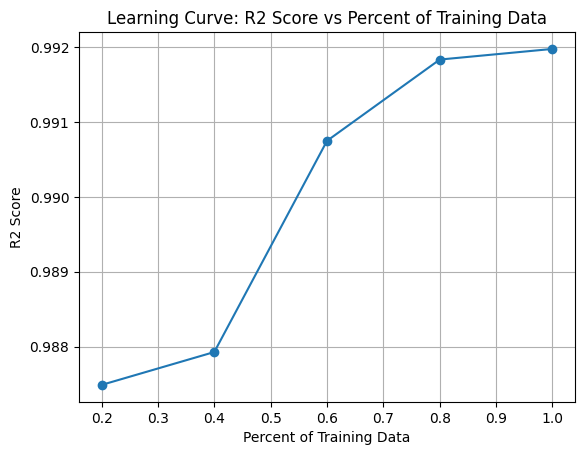

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

rnn_model = Sequential()
rnn_model.add(LSTM(64, input_shape=(12, 1), activation='linear', return_sequences=True))
rnn_model.add(LSTM(32, activation='sigmoid', return_sequences=True))
rnn_model.add(LSTM(16, activation='linear'))
rnn_model.add(Dense(64, activation='sigmoid'))
rnn_model.add(Dense(32, activation='sigmoid'))
rnn_model.add(Dense(1))
rnn_model.compile(loss='mean_squared_error', optimizer='adam')


training_set_sizes = np.linspace(0.2, 1.0, 5)  

rnn_r2_scores = []

for fraction in training_set_sizes:
    subset_size = int(fraction * X_train.shape[0])
    X_subset = X_train[:subset_size]
    y_subset = y_train[:subset_size]
    
    tensorboard_callback2 = TensorBoard(log_dir='./logs')
    history_rnn = rnn_model.fit(X_subset, y_subset, epochs=20, batch_size=10, validation_split=0.2, callbacks=[tensorboard_callback2])

    rnn_loss = rnn_model.evaluate(X_test, y_test)
    
    rnn_y_pred = rnn_model.predict(X_test)
    rnn_r2 = r2_score(y_test, rnn_y_pred) 
    rnn_r2_scores.append(rnn_r2)  

plt.plot(training_set_sizes, rnn_r2_scores, marker='o')
plt.xlabel('Percent of Training Data')
plt.ylabel('R2 Score')
plt.title('Learning Curve: R2 Score vs Percent of Training Data')
plt.grid(True)
plt.savefig("R2curve_rnn.png", dpi=500)
plt.show()


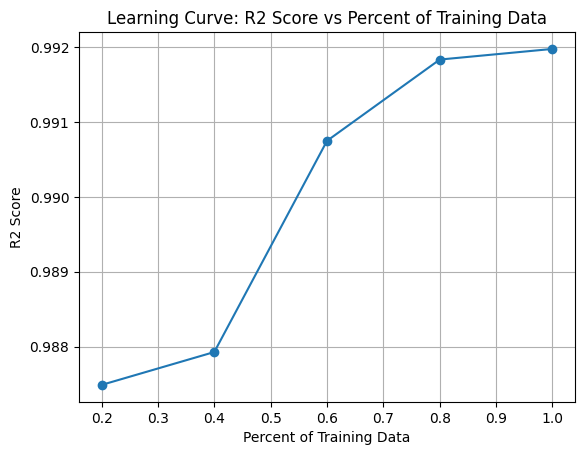

In [38]:
plt.plot(training_set_sizes, rnn_r2_scores, marker='o')
plt.xlabel('Percent of Training Data')
plt.ylabel('R2 Score')
plt.title('Learning Curve: R2 Score vs Percent of Training Data')
plt.grid(True)
plt.savefig("R2curve_rnn.png",dpi=500)
plt.show()

### SHAP

In [ ]:
import shap

subset_size = int(0.1 * len(X_train))
X_train_subset = X_train[:subset_size]

explainer = shap.Explainer(rnn_model,X_train_subset)

shap_values = explainer.shap_values(X_train_subset)
X_train_subdf=pd.DataFrame(X_train_subset)

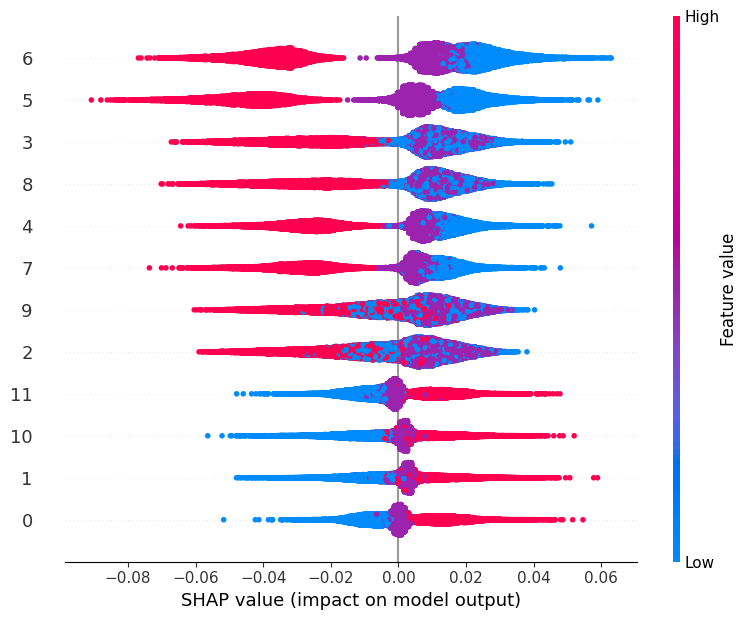

<Figure size 640x480 with 0 Axes>

In [39]:
#shap.plots.bar(shap_values,X_test)
%matplotlib inline
plt.figure()
shap.summary_plot(shap_values, X_train_subdf,plot_type='dot')
plt.savefig('shap_new.png', dpi=500)
plt.show()

## Random Forest Regressor

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexin

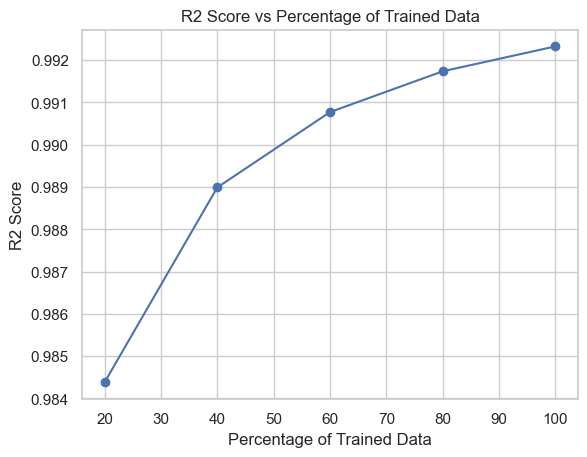

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


param_grid1 = {
    'n_estimators': [50, 100, 150],
    'min_samples_split': [10, 15, 20]
}

rf1 = RandomForestRegressor(random_state=42)

rf1_grid_search = GridSearchCV(estimator=rf1, param_grid=param_grid1, cv=5)

percentages = np.linspace(0.2, 1.0, 5)
rf1_r2_scores = []

for fraction in percentages:
    subset_size = int(fraction * X_train.shape[0])
    X_subset = X_train[:subset_size]
    y_subset = y_train[:subset_size]

    rf1_grid_search.fit(X_subset, y_subset)
    rf1_y_pred = rf1_grid_search.predict(X_subset)
    rf1_r2 = r2_score(y_subset, rf1_y_pred)
    rf1_r2_scores.append(rf1_r2)

plt.plot(percentages * 100, rf1_r2_scores, marker='o')
plt.xlabel('Percentage of Trained Data')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Percentage of Trained Data')
plt.grid(True)
plt.savefig('rfr2curve.png')
plt.show()


In [170]:
rf1_grid_search.best_estimator_

RandomForestRegressor(min_samples_split=10, n_estimators=150, random_state=42)

In [172]:
rf1_grid_result = rf1_grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
rf1_best_model = rf1_grid_result.best_estimator_

# Train the best model and collect training history for learning curves
rf1_history = rf1_best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
rf1f_y_pred = rf1_best_model.predict(X_test)

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.


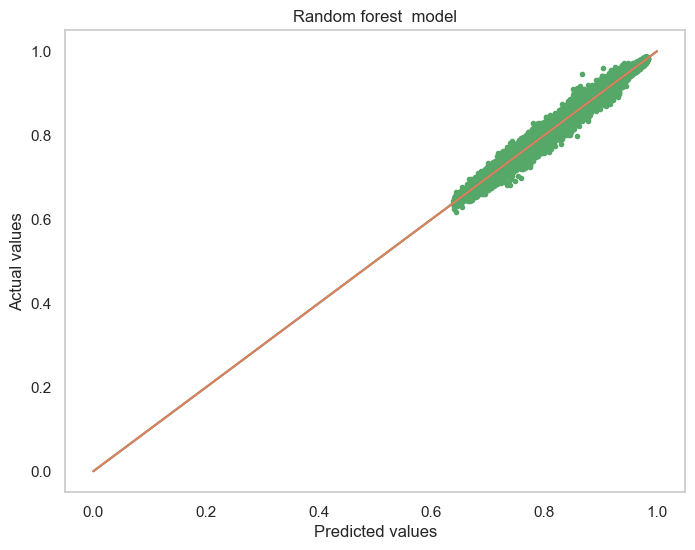

In [174]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
t1 = [0,0.5, 1]

s1 = [0,0.5, 1]

plt.rcParams["font.size"] = 20
plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(8, 6))
plt.plot(rf1f_y_pred[0:X_test.shape[0]], y_test[0:X_test.shape[0]], 'g.', t1, t1, s1, s1)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Random forest  model')
plt.grid(False)
plt.savefig("rf1_actpre.png", dpi=500)
plt.show()

MAE score of Random Forest model is  0.0061
RMSE score of Random Forest model is  0.01
R2 score of Random Forest model is  0.9883


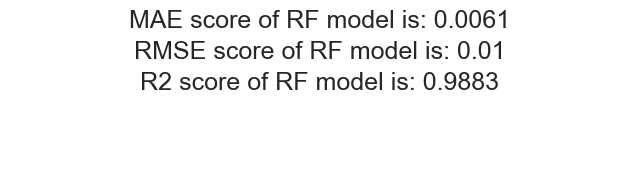

In [518]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

rf1f_mse = round(mean_squared_error(y_test, rf1f_y_pred),4)
rf1f_rmse=round(np.sqrt(rf1f_mse),4)

rf1f_mae = round(mean_absolute_error(y_test, rf1f_y_pred),4)
rf1f_r2=round(r2_score(y_test, rf1f_y_pred),4)
print("MAE score of Random Forest model is ", rf1f_mae)
print("RMSE score of Random Forest model is ", rf1f_rmse)
print("R2 score of Random Forest model is ", rf1f_r2)


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,2))

plt.rcParams["font.size"] = 18
plt.rcParams["font.family"] = "Arial"

ax.text(0.5, 0.9, f"MAE score of RF model is: {rf1f_mae}", ha="center")
ax.text(0.5, 0.7, f"RMSE score of RF model is: {rf1f_rmse}", ha="center")
ax.text(0.5, 0.5, f"R2 score of RF model is: {rf1f_r2}", ha="center")

ax.axis("off")

plt.savefig("rf1f_scores.png", dpi=300)

plt.show()


In [ ]:
model_rf__scores=  {'Model': 'Random Forest Model', 'Metric': ['MAE', 'RMSE', 'R2'],'Score': [0.0061, 0.01, 0.9883]}
model_rf= pd.DataFrame(model_rf__scores)

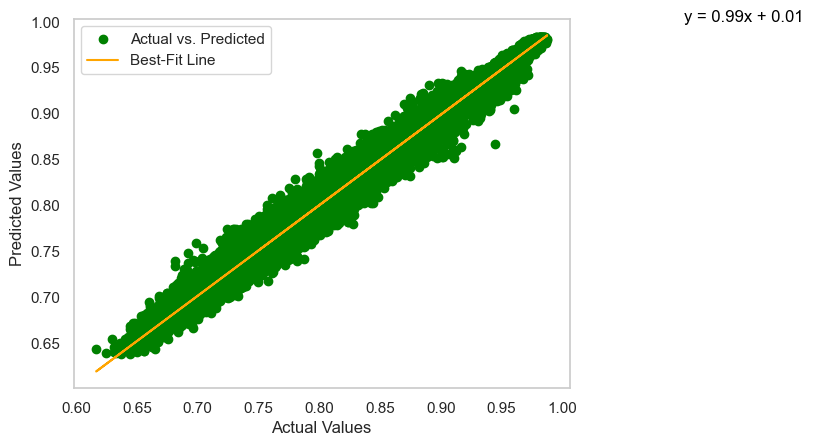

In [521]:
slope3, intercept3 = np.polyfit(y_test, rf1f_y_pred, 1)
best_fit_line3 = slope3 * y_test + intercept3

# Plot the actual vs. predicted values and the best-fit line
plt.scatter(y_test, rf1f_y_pred, color='green',label='Actual vs. Predicted')
plt.plot(y_test, best_fit_line3,  color='orange',label='Best-Fit Line')
equation3 = f'y = {slope3.item():.2f}x + {intercept3.item():.2f}'
plt.text(1.1, 1, equation3, fontsize=12, color='black')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(False)
plt.savefig('bestline3.png')
plt.show()



In [543]:
import numpy as np

y_test_reshaped = np.array(y_test).reshape((-1, 1))
rf1f_y_pred_reshaped = rf1f_y_pred.reshape((-1, 1))

f_statistic3, p_value3 = f_oneway(rf1f_y_pred_reshaped, y_test_reshaped)
print(p_value3)
print(f_statistic3)
rf1f_y_pred_reshaped

[0.91331748]
[0.01184943]


array([[0.95080283],
       [0.75068288],
       [0.85120857],
       ...,
       [0.86287415],
       [0.83384654],
       [0.74533816]])

PS1: 0.0362236372685106
PS2: 0.04600680044714412
PS3: 0.09042049933216688
PS4: 0.0926095385030689
PS5: 0.08170070661913266
PS6: 0.15971117335077653
PS7: 0.16050560608362227
PS8: 0.08084813562545329
PS9: 0.08669351722485467
PS10: 0.08161297042459915
PS11: 0.04672664543272594
PS12: 0.036940769687944984


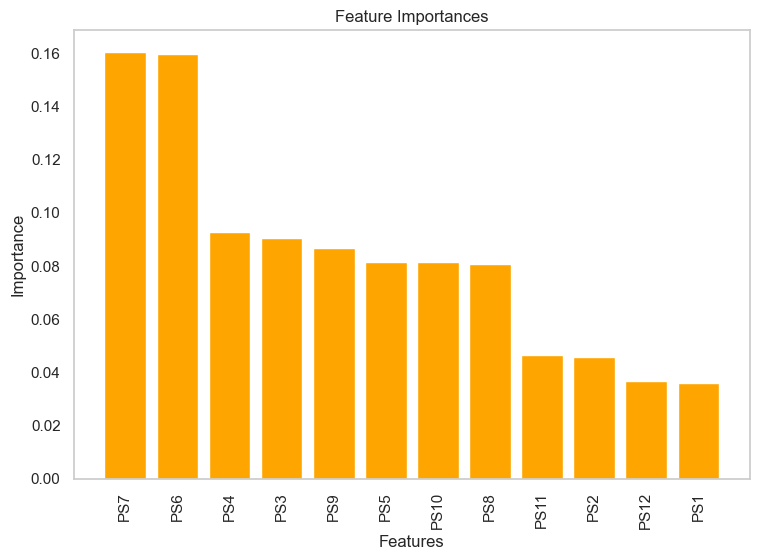

In [225]:
import numpy as np
import matplotlib.pyplot as plt
feature_importances = rf1_best_model.feature_importances_
feature_names=['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'PS7', 'PS8', 'PS9', 'PS10', 'PS11', 'PS12']
for feature, importance in zip(feature_names, feature_importances):
    print(f"{feature}: {importance}")
    
        

indices = np.argsort(feature_importances)[::-1]
feature_names = [str(i) for i in feature_names]

plt.rcParams["font.size"] = 20
plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center", color='orange')
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.grid(False)
plt.savefig("feature_importance1.png", dpi=500)

plt.show()


## PCA

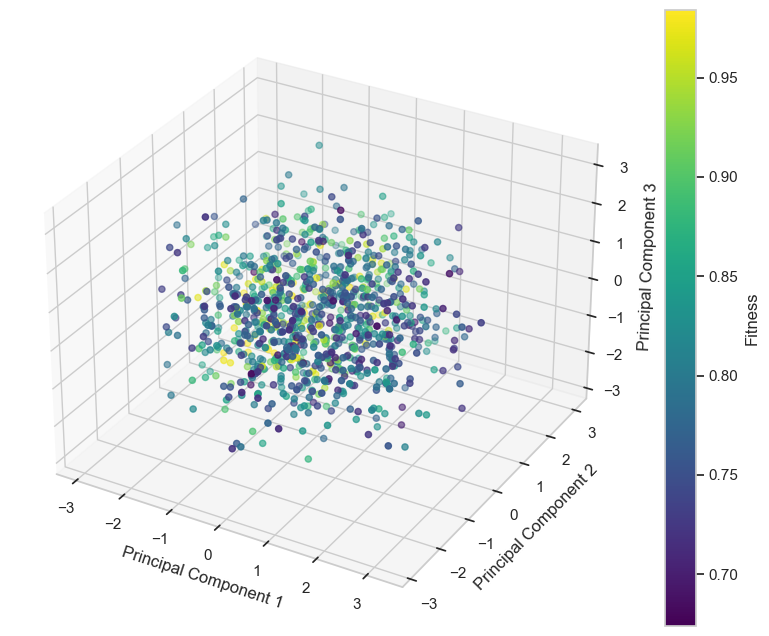

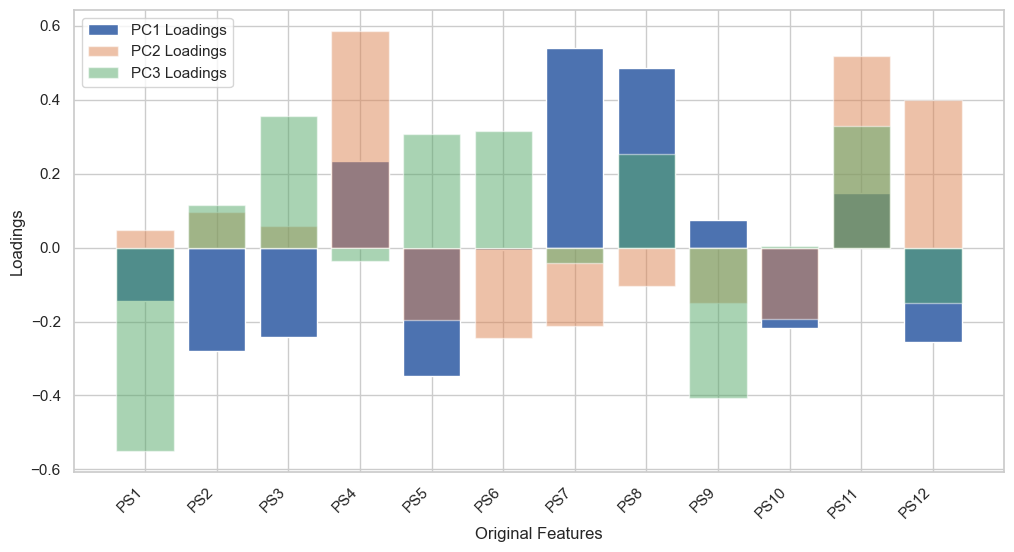

In [325]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_df = pd.DataFrame(X_train, columns=['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'PS7', 'PS8', 'PS9', 'PS10', 'PS11', 'PS12'])
y_df = pd.Series(y_train, name='Fitness')

n_samples = X_train.shape[0]


subset_size = 1000

subset_indices = np.random.choice(n_samples, size=subset_size, replace=False)

X_subset = X_train[subset_indices]
y_subset = y_train.iloc[subset_indices]  

scaler = StandardScaler()
X_subset_scaled = scaler.fit_transform(X_subset)

n_components = 3
pca = PCA(n_components=n_components)
X_subset_pca = pca.fit_transform(X_subset_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_subset_pca[:, 0], X_subset_pca[:, 1], X_subset_pca[:, 2], c=y_subset, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(scatter, label='Fitness')
plt.savefig('pca_subset_3d.png')
plt.show()

loadings = pca.components_

X_subset_df = pd.DataFrame(X_subset, columns=X_df.columns)

loadings_df = pd.DataFrame(loadings, columns=X_df.columns)

fig5=plt.figure(figsize=(12, 6))
plt.bar(X_df.columns, loadings_df.loc[0], label='PC1 Loadings')
plt.bar(X_df.columns, loadings_df.loc[1], label='PC2 Loadings', alpha=0.5)
plt.bar(X_df.columns, loadings_df.loc[2], label='PC3 Loadings', alpha=0.5)
plt.xlabel('Original Features')
plt.ylabel('Loadings')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.savefig('loadings_subset_3components.png')
plt.show()

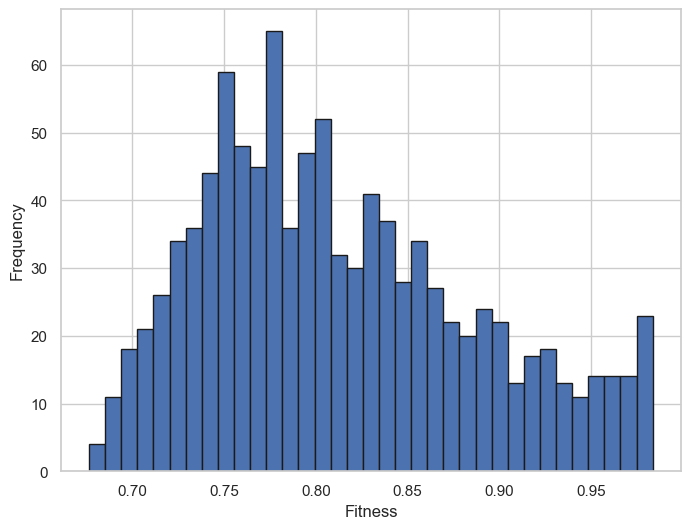

In [549]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(y_subset, bins=35, edgecolor='k')
plt.xlabel('Fitness')
plt.ylabel('Frequency')
plt.savefig('hist3.png',dpi=1280)
plt.show()



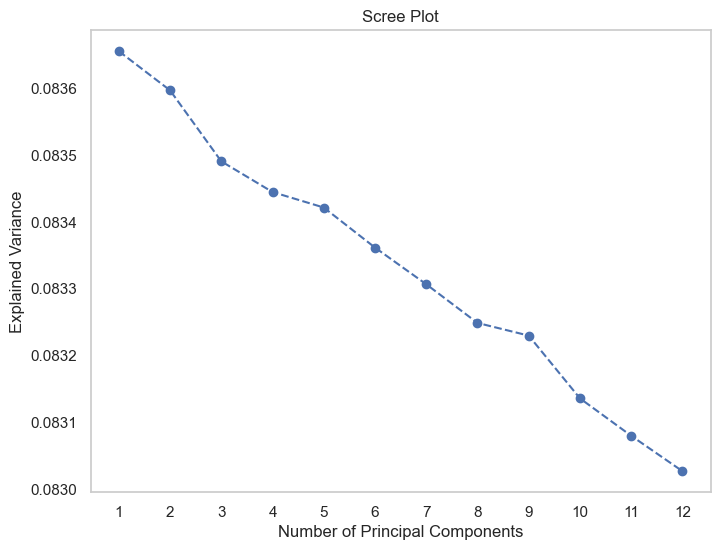

In [309]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca1 = PCA()
pca1.fit(X_df.values)

explained_variance = pca1.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.grid()
plt.savefig('scree.png',dpi=500)
plt.show()


## UMAP

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


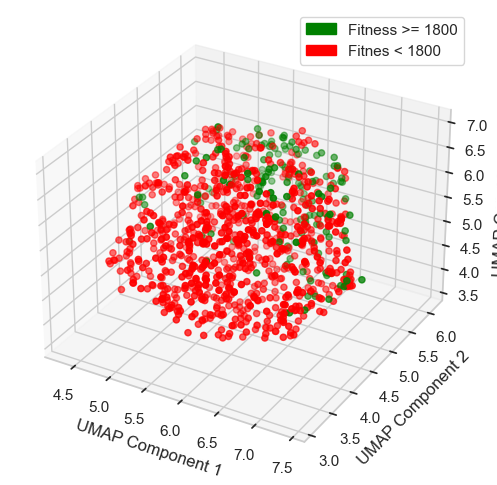

In [458]:
import umap

X_df = pd.DataFrame(X_train, columns=['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'PS7', 'PS8', 'PS9', 'PS10', 'PS11', 'PS12'])
y_df = pd.Series(y_train, name='Fitness')

n_samples = X_train.shape[0]

subset_size = 1000

subset_indices = np.random.choice(n_samples, size=subset_size, replace=False)

X_subset = X_train[subset_indices]
y_subset = y_train.iloc[subset_indices]  
fitness_color=['green' if y>=0.9 else 'red' for y in y_subset]
fitness_mapping = [1 if y>=0.9 else 0 for  y in y_subset ]

umap_model1 = umap.UMAP(n_components=3,random_state=30,n_neighbors=300, min_dist=0.0001)
umap_transformed1 = umap_model1.fit_transform(X_subset)


fig6 = plt.figure(figsize=(6, 6))
ax3 = fig6.add_subplot(111, projection='3d')  

scatter_umap = ax3.scatter(umap_transformed1[:, 0], umap_transformed1[:, 1], umap_transformed1[:, 2], c=fitness_color) 
ax3.set_xlabel('UMAP Component 1')  
ax3.set_ylabel('UMAP Component 2')  
ax3.set_zlabel('UMAP Component 3')  
legend_labels = ['Fitness >= 1800', 'Fitnes < 1800']
legend_handles = [mpatches.Patch(color='green', label='Fitness >= 1800'), mpatches.Patch(color='red', label='Fitness < 1800')]
ax3.legend(handles=legend_handles, labels=legend_labels)
#ax3.legend()
plt.savefig('umap_3d_fit4.png', dpi=300)
plt.show()


In [409]:
X_subset_df = pd.DataFrame(X_subset, columns=['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'PS7', 'PS8', 'PS9', 'PS10', 'PS11', 'PS12'])
X_subset_df['fitness_mapping'] = fitness_mapping
c1=X_subset_df[X_subset_df['fitness_mapping']==1]
c1.describe().round(4)
c0=X_subset_df[X_subset_df['fitness_mapping']==0]
c0.describe()
c0.describe().round(4)


,PS1,PS2,PS3,PS4,PS5,PS6,PS7,PS8,PS9,PS10,PS11,PS12,fitness_mapping
count,840.0000,840.0000,840.0000,840.0000,840.0000,840.0000,840.0000,840.0000,840.0000,840.0000,840.0000,840.0000,840.0
mean,1.9655,1.9631,2.0571,2.0655,2.1143,2.0940,2.0869,2.0143,2.0536,2.0560,1.9940,1.9714,0.0
std,0.8155,0.8110,0.8280,0.8107,0.8119,0.8297,0.8175,0.8154,0.8218,0.8173,0.8059,0.8179,0.0
min,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0
25%,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0
50%,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,0.0
75%,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,0.0
max,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,0.0


In [420]:
fitness_mapping = [1 if y>=0.9 else 0 for  y in target ]
g_df = pd.DataFrame(genome_arr, columns=['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'PS7', 'PS8', 'PS9', 'PS10', 'PS11', 'PS12'])
g_df['fitness_mapping'] = fitness_mapping
c1=g_df[g_df['fitness_mapping']==1]
c1.describe()
c0=g_df[g_df['fitness_mapping']==0]
c0.describe()
c0.describe()


,PS1,PS2,PS3,PS4,PS5,PS6,PS7,PS8,PS9,PS10,PS11,PS12,fitness_mapping
count,449235.000000,449235.000000,449235.000000,449235.000000,449235.000000,449235.000000,449235.000000,449235.000000,449235.000000,449235.000000,449235.000000,449235.000000,449235.0
mean,1.971928,1.969869,2.022803,2.054168,2.061262,2.085971,2.085971,2.061262,2.054168,2.022803,1.969869,1.971928,0.0
std,0.814298,0.815666,0.822287,0.823231,0.819748,0.817572,0.817572,0.819748,0.823231,0.822287,0.815666,0.814298,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.0
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.0
